### Multiclass Logistic Regression on Cardiotocography dataset for FHR pattern Class code 1 to 10

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
data = pd.read_excel("CTG.xls","Raw Data")
data = data[1:-3]

In [25]:
# Dividing dataset into train and test set 75% data into training set, rest into test set
ind = np.random.rand(len(data)) < 0.75
train = data[ind]
test = data[~ind]

In [26]:
# Train set   also the classes are available in one hot form already in dataset(Given in Description sheet of dataset)
X = train[['LBE','LB','AC','FM','UC','ASTV','MSTV','ALTV','MLTV','DL','DS','DP','Width','Min','Max','Nmax','Nzeros','Mode','Mean','Median','Variance','Tendency']]
Y = train[['A','B','C','D','E','AD','DE','LD','FS','SUSP']]
Y_class = Y.to_numpy()
X = X.to_numpy()
print("Size of training set is",len(X))

Size of training set is 1645


In [27]:
# Test set
Xt = test[['LBE','LB','AC','FM','UC','ASTV','MSTV','ALTV','MLTV','DL','DS','DP','Width','Min','Max','Nmax','Nzeros','Mode','Mean','Median','Variance','Tendency']]
Yt = test[['A','B','C','D','E','AD','DE','LD','FS','SUSP']]
Yt_class = Yt.to_numpy()
Xt = Xt.to_numpy()
print("Size of test set is",len(Yt_class))

Size of test set is 481


In [28]:
# Adding ones column on training set data
ones = np.asmatrix(np.ones(len(X))).T
X = np.hstack((ones,X))
N = len(X)

In [29]:
# Standardization of training set
for i in range(1,23):
    X[:,i] = (X[:,i] - np.mean(X[:,i]))/np.std(X[:,i])

In [30]:
# function to calculate (W*X)
def W_x_X(X, W):
    return (X.dot(W))

In [31]:
# Softmax function, substracted by max to remove nan values
def softmax(a):
    a_max = np.max(a, axis=-1)
    exp_a = np.exp(a - a_max)
    return exp_a / np.sum(exp_a, axis=-1)

In [32]:
# For labelling on predicton, gives one to maximum probability column
def classlabel(z):
    return z.argmax(axis=1)

In [33]:
# Cross Entropy Function
def crossEntropy(y_pred, y):
    return - np.sum(np.multiply(np.log(y_pred),(y)),axis=0)

In [34]:
# Calculates Cost
def cost(y_pred,y):
    return np.mean(crossEntropy(y_pred,y))

In [35]:
# Calculates Gradient of Cost
def gradCost(y_pred,y,X):
    return X.T @ (y_pred - y)

In [36]:
# Initializing Weight Matrix of size (p,k)   where p = number of features and k = number of classes
#W = np.random.random(size=(23,10))
W = np.random.randint(-10,10,size=(23,10))
#W = np.zeros((23,10))

In [37]:
inp = W_x_X(X,W)
y_pred = softmax(inp)
crossentropy = crossEntropy(y_pred,Y_class)
J = cost(y_pred,Y_class)
grad = gradCost(y_pred,Y_class,X)
W = W - 0.01*(grad)

In [38]:
# Applying Gradient Descent 
iterations = 2500
alpha = 0.01
Jj = []
for i in range(iterations):
    inp = W_x_X(X,W)
    y_pred = softmax(inp)
    #print(y_pred,"\n\n\n")
    crossentropy = crossEntropy(y_pred,Y_class)
    J = cost(y_pred,Y_class)
    Jj.append(J)
    grad = gradCost(y_pred,Y_class,X)
    W = W - alpha*(grad)
    #print(W,"\n\n\n")
print("The weights after Gradient Descent are \n\n",W)

The weights after Gradient Descent are 

 [[ 4.41983983e+00  2.14735002e+01 -1.84647975e+00 -1.66415453e+00
   2.05711273e+00  2.46231121e+01  1.05876552e+01 -1.10614255e+01
  -2.69354225e+01 -2.56537377e+01]
 [-2.48924909e+00 -6.35684846e+00 -3.01489810e+00 -9.95023106e+00
  -9.43695772e+00 -7.77226297e-01  4.90855315e+00  6.49950463e+00
   3.43410864e+00  3.18324429e+00]
 [ 3.51075091e+00  3.64315154e+00  6.98510190e+00 -4.95023106e+00
  -4.43695772e+00 -1.77722630e+00 -3.09144685e+00  1.49950463e+00
   7.43410864e+00  7.18324429e+00]
 [-5.99766110e+00  1.12192434e+01 -9.02270810e+00  1.22362325e+01
  -9.64379025e+00  1.02119325e+01 -1.55474692e+01  3.17666542e-01
   8.84829685e+00 -6.62174312e+00]
 [-2.66024078e+00 -1.21718161e+00  2.73327776e+00  1.67977245e+00
   3.49188752e+00 -1.30365858e+00 -1.62372714e+00 -4.27743198e-01
  -4.94198309e+00  5.26959667e+00]
 [ 1.41763362e+00  1.48999086e-01 -2.82884359e-01  7.73615000e-02
   4.69620415e-02  1.81321104e-01 -3.65065832e-01 -7.8010

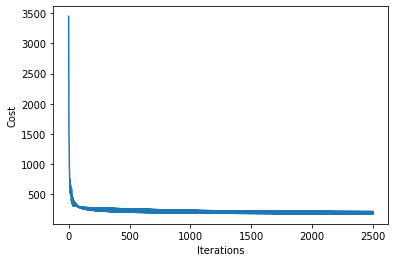

In [39]:
# Plotting cost
plt.plot(Jj)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

In [40]:
# Getting labels of Given dataset between 0-9
label_train = classlabel(Y_class)
# Getting labels of result from Logistic Regression
label_pred = classlabel(y_pred)

In [41]:
# Calculating misclassifications on Training set
count = 0
for i in range(len(label_train)):
    if label_pred[i,0]!=label_train[i]:
        count = count + 1
        #print(i,"\t",y_pred_classes[i],"\t",Y_class[i])
print("Total ",count," out of ",len(X),"are misclassified giving accuracy of",100*((len(X)-count)/len(X))," on training set")

Total  278  out of  1645 are misclassified giving accuracy of 83.10030395136778  on training set


In [42]:
# Calculations on test set
# adding ones column
ones = np.asmatrix(np.ones(len(Xt))).T
Xt = np.hstack((ones,Xt))

# Standardization of test set
for i in range(1,23):
    Xt[:,i] = (Xt[:,i] - np.mean(Xt[:,i]))/np.std(Xt[:,i])


inpt = W_x_X(Xt,W)
y_pred_t = softmax(inpt)

In [43]:
# Getting labels of Given dataset between 0-9
label_test = classlabel(Yt_class)
# Getting labels of result from Logistic Regression
label_pred_test = classlabel(y_pred_t)

In [44]:
# Calculating misclassifications on Training set
count_t = 0
for i in range(len(label_test)):
    if label_pred_test[i,0]!=label_test[i]:
        count_t = count_t + 1
        #print(i,"\t",y_pred_classes[i],"\t",Y_class[i])
print("Total ",count_t," out of ",len(Xt),"are misclassified giving accuracy of",100*((len(Xt)-count_t)/len(Xt))," on test set")

Total  120  out of  481 are misclassified giving accuracy of 75.05197505197505  on test set
